## Testing all the algorithms till now 
- All the algorithms, i.e., Basic, Iterative, SPEA are analysed for 1-qubit and 2-qubit matrices chosen manually.
- One of the matrix that was chosen for single qubit was the **X gate** and a phase matrix with phase **1/6**.

- **BASIS of TESTING** 
    - Each of the algorithm is given a unitary and run for increasing precision.
    - The algorithm which converges faster is the better algorithm.
    - Converges faster means the amount of iterations of the algorithm required to compute $\theta$ upto 6 bit precision

In [1]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector  
import numpy as np 
import os  
from time import sleep
import sys
sys.path.append("..")
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
os.makedirs(name = "Plots/1-qubit/",exist_ok=True)

In [2]:
from Modules.vanilla_qpe import QPE 
from Modules.iterative_qpe import IQPE
from Modules.normal_SPEA import SPEA 
from Modules.kitaev_qpe import KQPE

## X gate

- Eigenvectors : $|+\rangle\ and\ |-\rangle$
- Eigenphases : $0\ or\ 1$ and $\frac{1}{2}$

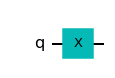

In [4]:
# x gate 
u1 = QuantumCircuit(1)
u1.x(0)
u1.draw('mpl')

## Phase gate (1/6)

- Eigenvectors : $|0\rangle\ and\ |1\rangle$
- Eigenphases : $0\ or\ 1$ and $\frac{1}{6}$

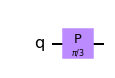

In [5]:
# x gate 
u2 = QuantumCircuit(1)
u2.p(2*np.pi*(1/6),0)
u2.draw('mpl')

In [6]:
backend = Aer.get_backend('qasm_simulator')

In [7]:
os.makedirs(name = "Plots/1-qubit/x_gate/",exist_ok=True)
x_path = "Plots/1-qubit/x_gate/"

## Testing the Unitary Phase Estimation
- **Basic QPE**

In [8]:
estimates = []
for precision in range(1,9): 
    qpe = QPE(precision=precision,unitary = u1)
    qpe_circ = qpe.get_QPE(show = False)
    qc = QuantumCircuit(precision+1,precision)
    qc.x(precision)
    qc.h(precision)
    qc.append(qpe_circ, qargs = list(range(precision+1)))
    qc.measure(list(range(precision)),list(range(precision)))
#     display(qc.draw('mpl')) 
    counts = execute(qc,backend=backend,shots = 2**10).result().get_counts()
    m = -1 
    for i,j in counts.items():
        if j > m:
            m = j 
            phase = i 
    factor = 0.5
    ans = 0.0 
    for i in range(precision):
        ans+= int(phase[i])*factor 
        factor/=2 
    estimates.append(ans)

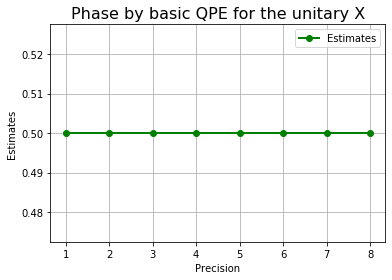

In [9]:
plt.title("Phase by basic QPE for the unitary X",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(x_path+"basic_qpe.JPG",dpi = 200)

- **IQPE**

In [10]:
estimates = []
for precision in range(1,9): 
    qpe = IQPE(precision=precision,unitary = u1,unknown=True)
    qc = QuantumCircuit(precision+1,precision)
    qc.x(1)
    qc.h(1)    
    phase = qpe.get_circuit_phase(qc, qubits = [1], ancilla = 0,clbits = list(range(precision)),show = False)
#     display(qc.draw('mpl')) 
    estimates.append(phase[1])

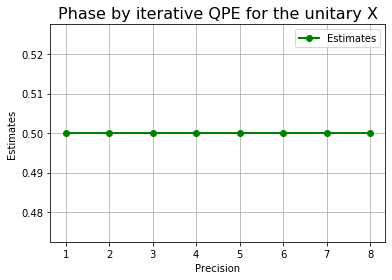

In [11]:
plt.title("Phase by iterative QPE for the unitary X",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(x_path+"iqpe.JPG",dpi = 200)

- SPEA

In [12]:
estimates = []
for resolution in range(10,40,5): 
    qpe = SPEA(resolution = resolution,unitary = u1, error =3)
    result = qpe.get_eigen_pair(backend = backend)
#     display(qc.draw('mpl')) 
    print("Result : ",result)
    estimates.append(result['theta'])

E:\ANACONDA\lib\site-packages\qiskit\circuit\quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.96875, 'theta': 0.5528549382716049, 'state': array([ 0.52759134+0.33111088j, -0.54203043-0.56410635j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.994140625, 'theta': 0.47544642857142844, 'state': array([-0.31479903-0.71020091j,  0.25713685+0.5748016j ])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.9609375, 'theta': 0.04966102930456334, 'state': array([ 0.10789118+0.64606713j, -0.12333211+0.7454837j ])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.978515625, 'theta': 0.45312499999999994, 'state': array([-0.79582856+0.10353206j,  0.59263247-0.06873699j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.79296875, 'theta': 0.12622621878715817, 'state': array([-0.32804402+0.1940035j , -0.60907441+0.69554161j])

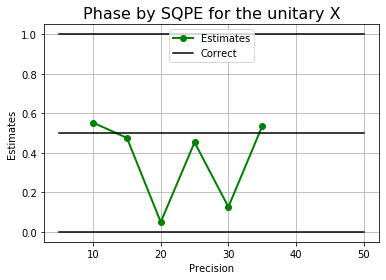

In [13]:
plt.title("Phase by SQPE for the unitary X",fontsize = 16)
plt.plot([i for i in range(10,40,5)],estimates,color = 'g',linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([5,50],[0.5,0.5],color = 'black')
plt.plot([5,50],[0,0],color = 'black')
plt.plot([5,50],[1,1],color = 'black',label = 'Correct')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(x_path+"stat_qpe.JPG",dpi = 200)

- Kitaev's Algorithm

In [14]:
estimates = []
for precision in range(5,16): 
    kqpe = KQPE(precision=precision,unitary = u1)
    kqpe_circ = kqpe.get_circuit()
    qc = QuantumCircuit(2+1,2)
    qc.x(2)
    qc.h(2)
    qc.append(kqpe_circ,qargs = [0,1,2])
    phase = kqpe.get_phase(qc,backend = backend, ancilla = [0,1],clbits = [0,1],show = False)
    print("Precision :",precision)
    print("Phase:",phase)
    estimates.append(phase[0])

Precision : 5
Phase: (-0.4950280260882054, [0, 0, 0, 0, 0])
Precision : 6
Phase: (-0.4930414087021073, [0, 0, 0, 0, 0, 0])
Precision : 7
Phase: (-0.4975134063605248, [0, 0, 0, 0, 0, 0, 0])
Precision : 8
Phase: (0.4954007081530134, [0, 1, 1, 1, 1, 1, 1, 0])
Precision : 9
Phase: (-0.4992539666683361, [0, 0, 0, 0, 0, 0, 0, 0, 0])
Precision : 10
Phase: (-0.4984147199882985, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Precision : 11
Phase: (-0.4998912026925678, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Precision : 12
Phase: (-0.49997668628779984, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Precision : 13
Phase: (0.49996114381349377, [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Precision : 14
Phase: (0.4998853742673482, [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])
Precision : 15
Phase: (-0.49976200603031357, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


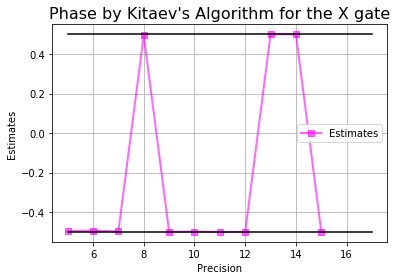

In [15]:
plt.title("Phase by Kitaev's Algorithm for the X gate",fontsize = 16)
plt.plot([i for i in range(5,16)],estimates,color = 'magenta',alpha = 0.6,linewidth = 2,marker = 's',label = 'Estimates')
plt.plot([5,17],[0.5,0.5],color = 'black')
plt.plot([5,17],[-0.5,-0.5],color = 'black')
plt.xlabel('Precision')     
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(x_path+"kitaev_qpe.JPG",dpi = 200)

## Testing the PEA for unitary phase gate
- Testing phase estimation for $\theta$ = 1/6
- Eigenvectror is $|1\rangle$

In [16]:
os.makedirs(name = "Plots/1-qubit/phase_gate/",exist_ok=True)
phase_path = "Plots/1-qubit/phase_gate/"

- **Basic QPE**

In [17]:
estimates = []
for precision in range(1,9): 
    qpe = QPE(precision=precision,unitary = u2)
    qpe_circ = qpe.get_QPE(show = False)
    qc = QuantumCircuit(precision+1,precision)
    qc.x(precision)
    qc.append(qpe_circ, qargs = list(range(precision+1)))
    qc.measure(list(range(precision)),list(range(precision)))
#     display(qc.draw('mpl')) 
    counts = execute(qc,backend=backend,shots = 2**10).result().get_counts()
    m = -1 
    for i,j in counts.items():
        if j > m:
            m = j 
            phase = i 
    factor = 0.5
    ans = 0.0 
    for i in range(precision):
        ans+= int(phase[i])*factor 
        factor/=2 
    estimates.append(ans)

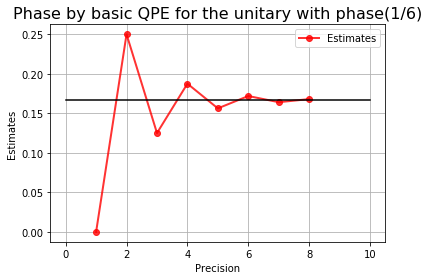

In [18]:
plt.title("Phase by basic QPE for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'red',alpha = 0.8, linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,10],[0.1667,0.1667], color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"basic_qpe.JPG",dpi = 200)

- **IQPE**

In [19]:
estimates = []
for precision in range(1,9): 
    qpe = IQPE(precision=precision,unitary = u2,unknown=True)
    qc = QuantumCircuit(1+1,precision)
    qc.x(1)   
    phase = qpe.get_circuit_phase(qc, qubits = [1], ancilla = 0,clbits = list(range(precision)),show = False)
#     display(qc.draw('mpl')) 
    estimates.append(phase[1])

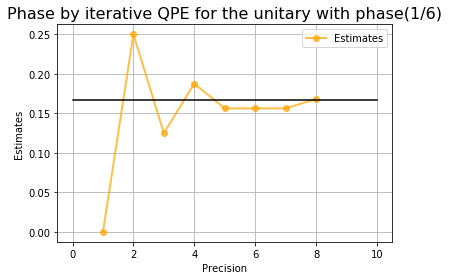

In [20]:
plt.title("Phase by iterative QPE for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(1,9)],estimates,color = 'orange',alpha = 0.7,linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([0,10],[0.1667,0.1667], color = 'black')
plt.xlabel('Precision')
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"iqpe.JPG",dpi = 200)

- **SPEA**

In [21]:
estimates = []
for resolution in range(10,40,5): 
    qpe = SPEA(resolution = resolution,unitary = u2, error =4)
    result = qpe.get_eigen_pair(backend = backend)
    print("Result : ",result)
    estimates.append(result['theta'])

Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.94140625, 'theta': 0.9471530992798355, 'state': array([ 0.8787918 -0.28486913j, -0.36755271-0.10714271j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.9140625, 'theta': 0.9359511661807579, 'state': array([ 0.43147333+0.7783455j , -0.17523572-0.42107184j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.984375, 'theta': 0.1560335872576177, 'state': array([0.01617332+0.34708606j, 0.91870544-0.18774985j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.908203125, 'theta': 0.9375, 'state': array([-0.09297114+0.87953802j, -0.16925543-0.4348814j ])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result :  {'cost': 0.921875, 'theta': 0.9315842554090948, 'state': array([ 0.85858256-0.30150845j, -0.41461915+0.00442778j])}
Maximum iterations

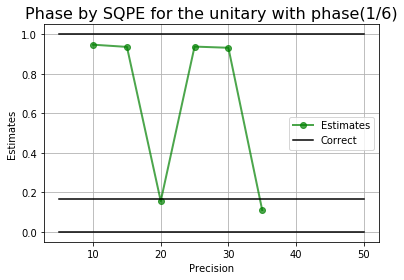

In [22]:
plt.title("Phase by SQPE for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(10,40,5)],estimates,color = 'g',alpha = 0.7,linewidth = 2,marker = 'o',label = 'Estimates')
plt.plot([5,50],[0.1667,0.1667],color = 'black')
plt.plot([5,50],[0,0],color = 'black')
plt.plot([5,50],[1,1],color = 'black',label = 'Correct')
plt.xlabel('Precision')     
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"stat_qpe.JPG",dpi = 200)

- Kitaev's Algorithm

In [23]:
estimates = []
for precision in range(5,16): 
    kqpe = KQPE(precision=precision,unitary = u2)
    kqpe_circ = kqpe.get_circuit()
    qc = QuantumCircuit(2+1,2)
    qc.x(2)   
    qc.append(kqpe_circ,qargs = [0,1,2])
    phase = kqpe.get_phase(qc,backend = backend, ancilla = [0,1],clbits = [0,1],show = False)
#     display(qc.draw('mpl')) 
    print("Precision :",precision)
    print("Phase:",phase)
    estimates.append(phase[0])

Precision : 5
Phase: (0.16448848187131543, [0, 0, 1, 0, 1])
Precision : 6
Phase: (0.1798610346993713, [0, 0, 1, 0, 1, 1])
Precision : 7
Phase: (0.1674376700890993, [0, 0, 1, 0, 1, 0, 1])
Precision : 8
Phase: (0.1701137138558181, [0, 0, 1, 0, 1, 0, 1, 1])
Precision : 9
Phase: (0.16900449809034734, [0, 0, 1, 0, 1, 0, 1, 1, 0])
Precision : 10
Phase: (0.1666938847808517, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0])
Precision : 11
Phase: (0.16442517106139565, [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])
Precision : 12
Phase: (0.1667900804454112, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])
Precision : 13
Phase: (0.16670306291053305, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
Precision : 14
Phase: (0.1663637030983478, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])
Precision : 15
Phase: (0.1663142932109304, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1])


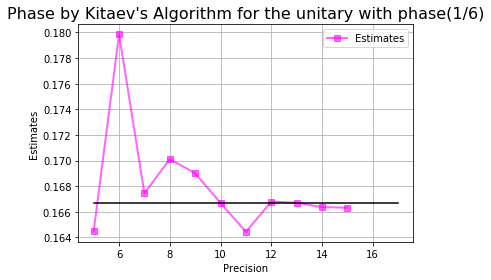

In [24]:
plt.title("Phase by Kitaev's Algorithm for the unitary with phase(1/6)",fontsize = 16)
plt.plot([i for i in range(5,16)],estimates,color = 'magenta',alpha = 0.6,linewidth = 2,marker = 's',label = 'Estimates')
plt.plot([5,17],[0.1667,0.1667],color = 'black')
plt.xlabel('Precision')     
plt.ylabel('Estimates')
plt.grid()
plt.legend()
plt.savefig(phase_path+"kitaev_qpe.JPG",dpi = 200)